In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

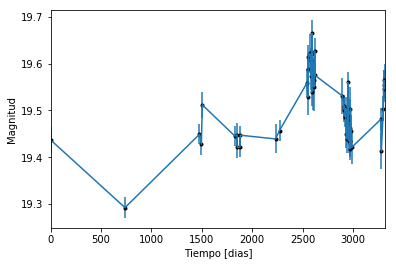

In [2]:
data = np.genfromtxt('LC_22275_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

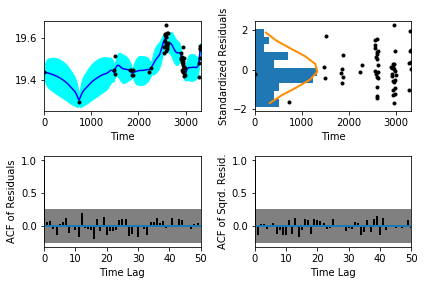

In [5]:
sample.assess_fit()

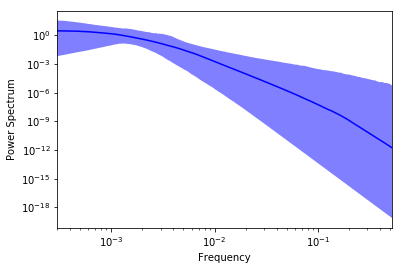

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0763297,'Medida del nivel de ruido')

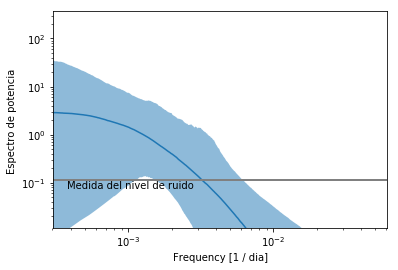

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

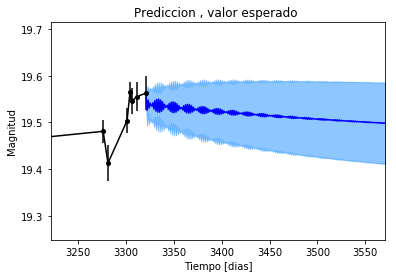

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

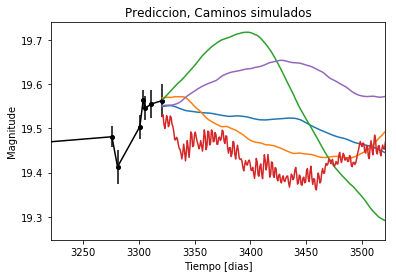

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


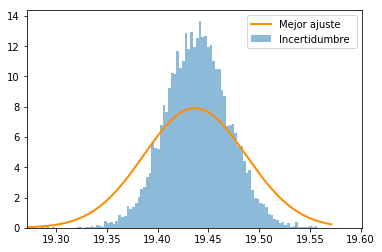

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

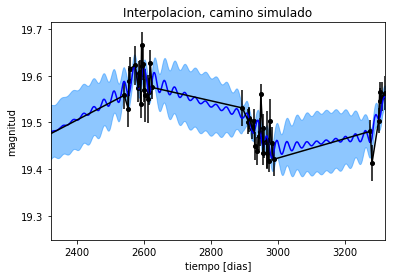

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

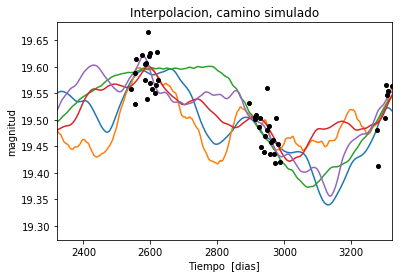

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 741.037158958
Median: 0.00471800185464
Standard deviation: 0.175218855301
68% credibility interval: [ 0.0005726   0.13349871]
95% credibility interval: [  3.36947055e-04   6.82393181e-01]
99% credibility interval: [  3.03651664e-04   9.66566340e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 986.484008171
Median: 0.00135053160492
Standard deviation: 0.0716170688346
68% credibility interval: [ 0.00044161  0.01936521]
95% credibility interval: [ 0.00032035  0.20862702]
99% credibility interval: [  3.03103513e-04   5.39387118e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 539.298897052
Median: 0.0118562665481
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1694.13295114
Median: 119.77679255
Standard deviation: 1.57238730232
68% credibility interval: [ 118.01083686  120.91035418]
95% credibility interval: [ 115.61862589  121.66290185]
99% credibility interval: [ 113.73448565  122.17104474]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 702.635564681
Median: 0.47952449314
Standard deviation: 2.04222844055
68% credibility interval: [ 0.04418733  3.36727824]
95% credibility interval: [ 0.01415503  6.82605096]
99% credibility interval: [  9.69267256e-03   9.97556109e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 330.323076487
Median: 0.177950609031
Standard deviation: 8.88130870336
68% credibility interval: [  2.90272525e-03   5.78364982e+00]
95% credibility interva

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1488.5511645
Median: 1.38595391215e-23
Standard deviation: 4.48979698509e+149
68% credibility interval: [  1.21895663e-69   1.67490171e+52]
95% credibility interval: [  4.60601350e-087   1.44382546e+133]
99% credibility interval: [  2.30719462e-100   1.25874757e+147]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2233.98768821
Median: 19.4642288702
Standard deviation: 0.0498393901127
68% credibility interval: [ 19.42381732  19.49776725]
95% credibility interval: [ 19.35963427  19.56010093]
99% credibility interval: [ 19.28891597  19.63996694]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 174.147550743
Median: 0.0025840570372
Standard deviation: 0.236891238004
68% credibility interval: [ 0.          0.27262193]
95% credibility interval: [ 0.          0.89501501]
99% credibility interval: [ 0.          1.01245552]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 174.147550743
Median: 0.0025840570372
Standard deviation: 0.236891238004
68% credibility interval: [ 0.          0.27262193]
95% credibility interval: [ 0.          0.89501501]
99% credibility interval: [ 0.          1.01245552]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 977.761515646
Median: 0.0
Standard deviation: 0.000733500958879
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1694.13295114
Median: 119.77679255
Standard deviation: 1.57238730232
68% credibility interval: [ 118.01083686  120.91035418]
95% credibility interval: [ 115.61862589  121.66290185]
99% credibility interval: [ 113.73448565  122.17104474]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1580.19768776
Median: 0.00908099704055
Standard deviation: 0.0157550662363
68% credibility interval: [ 0.00506543  0.01876777]
95% credibility interval: [ 0.0031481   0.05118379]
99% credibility interval: [ 0.00257353  0.09891607]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1968.29085508
Median: 1.17629422376
Standard deviation: 0.190153833698
68% credibility interval: [ 1.0033146   1.37673847]
95% credibility interval: [ 0.85678839  1.60821147]
99% credibility interval: [ 0.78393605  1.78441585]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 688.645016731
Median: 6.93912044921e-06
Standard deviation: 0.128260846254
68% credibility interval: [  4.41129017e-57   1.48582741e-03]
95% credibility interval: [  5.46193556e-138   8.43077098e-002]
99% credibility interval: [  2.68068265e-150   6.73217189e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 741.037158958
Median: (-0.0296440799323-1.21358007521j)
Standard deviation: 1.85134570478
68% credibility interval: [-0.83879713+0.j         -0.00359778-0.00618846j]
95% credibility interval: [ -4.28760281e+00-1.74655883j  -2.11710079e-03-0.00468869j]
99% credibility interval: [ -6.07311543e+00+0.j          -1.90789967e-03-0.00841548j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 986.484008171
Median: (-0.00848564033693+0.134421732541j)
Standard deviation: 1.55496413163
68% credibility interval: [-0.12167523+0.j         -0.00277472+0.02569041j]
95% credibility interval: [-1.31084220+2.19553073j -0.00201279+3.41312673j]
99% credibility interval: [ -3.38906922e+00+2.19294849j  -1.90445554e-03+0.00993759j]
Posterior su